**Answer 2.1**

In [113]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sb

In [114]:
mat = pd.read_csv("week2.csv")#Loading the week2.csv file

In [115]:
mat.head()

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,Day_Perc_Change,Trend
0,0,HDFC,EQ,2017-05-15,1549.80,1554.5,1572.60,1554.10,1561.0,1559.50,1562.62,1270297,1.984990e+09,59917,955875,75.25,5,2017,0.000000,Slight or No change
1,1,HDFC,EQ,2017-05-16,1559.50,1558.0,1569.00,1554.00,1568.0,1566.55,1564.05,2114918,3.307844e+09,79354,1652379,78.13,5,2017,0.004521,Slight or No change
2,2,HDFC,EQ,2017-05-17,1566.55,1565.5,1570.95,1549.75,1550.1,1552.50,1557.08,2161434,3.365526e+09,80317,1794472,83.02,5,2017,-0.008969,Slight or No change
3,3,HDFC,EQ,2017-05-18,1552.50,1547.0,1558.60,1526.50,1545.0,1537.05,1539.03,2404372,3.700407e+09,85842,1837821,76.44,5,2017,-0.009952,Slight or No change
4,4,HDFC,EQ,2017-05-19,1537.05,1545.0,1548.00,1515.35,1526.5,1520.60,1526.14,2142433,3.269652e+09,113875,1601236,74.74,5,2017,-0.010702,Slight or No change


In [116]:
mat.drop('Unnamed: 0', axis=1, inplace=True) 

In [117]:
mat["Date"] = pd.to_datetime(mat["Date"])#Converting data type of "date" to datetime64

In [118]:
mat.dtypes

Symbol                            object
Series                            object
Date                      datetime64[ns]
Prev Close                       float64
Open Price                       float64
High Price                       float64
Low Price                        float64
Last Price                       float64
Close Price                      float64
Average Price                    float64
Total Traded Quantity              int64
Turnover                         float64
No. of Trades                      int64
Deliverable Qty                    int64
% Dly Qt to Traded Qty           float64
Month                              int64
Year                               int64
Day_Perc_Change                  float64
Trend                             object
dtype: object

In [119]:
mat.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,Day_Perc_Change,Trend
0,HDFC,EQ,2017-05-15,1549.80,1554.5,1572.60,1554.10,1561.0,1559.50,1562.62,1270297,1.984990e+09,59917,955875,75.25,5,2017,0.000000,Slight or No change
1,HDFC,EQ,2017-05-16,1559.50,1558.0,1569.00,1554.00,1568.0,1566.55,1564.05,2114918,3.307844e+09,79354,1652379,78.13,5,2017,0.004521,Slight or No change
2,HDFC,EQ,2017-05-17,1566.55,1565.5,1570.95,1549.75,1550.1,1552.50,1557.08,2161434,3.365526e+09,80317,1794472,83.02,5,2017,-0.008969,Slight or No change
3,HDFC,EQ,2017-05-18,1552.50,1547.0,1558.60,1526.50,1545.0,1537.05,1539.03,2404372,3.700407e+09,85842,1837821,76.44,5,2017,-0.009952,Slight or No change
4,HDFC,EQ,2017-05-19,1537.05,1545.0,1548.00,1515.35,1526.5,1520.60,1526.14,2142433,3.269652e+09,113875,1601236,74.74,5,2017,-0.010702,Slight or No change


In [120]:
mat.set_index("Date",inplace = True)#Setting date column as index

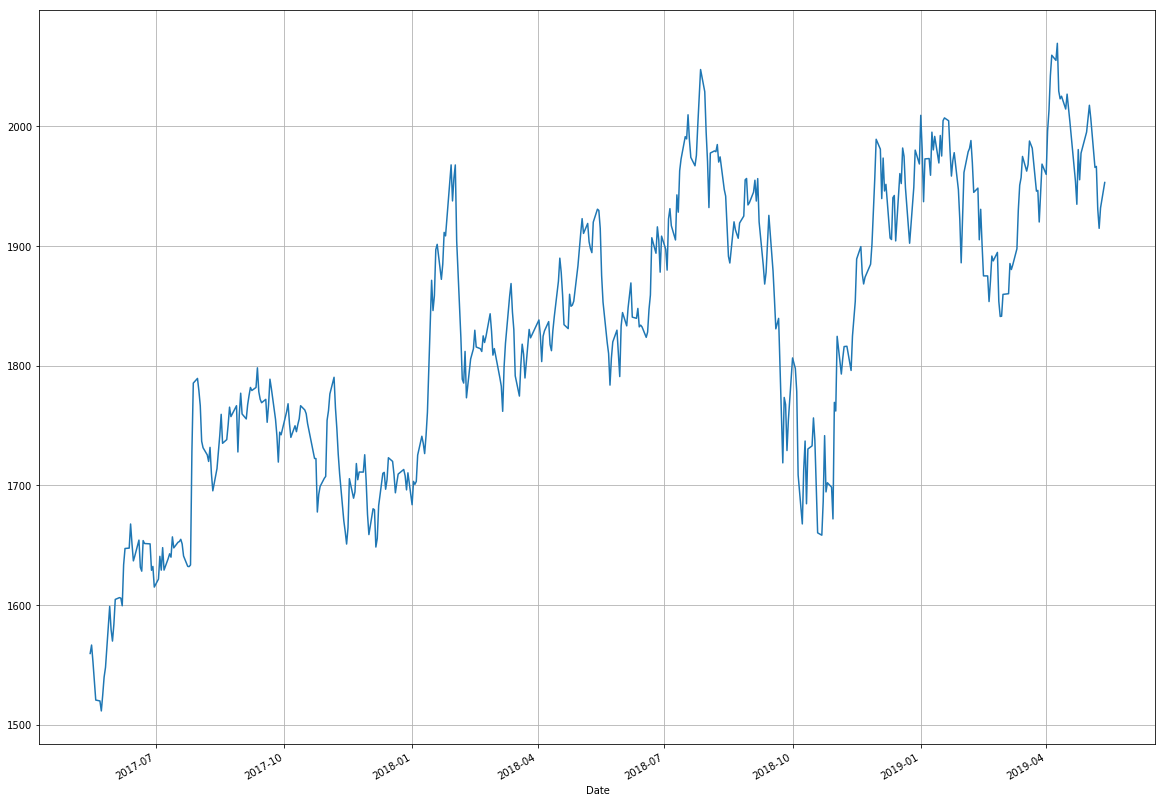

In [121]:
#Plotting the close price on a time series plot
fig, ax = plt.subplots(figsize=(20,15))
mat["Close Price"].plot(ax=ax)
plt.grid()

**Answer 2.2**

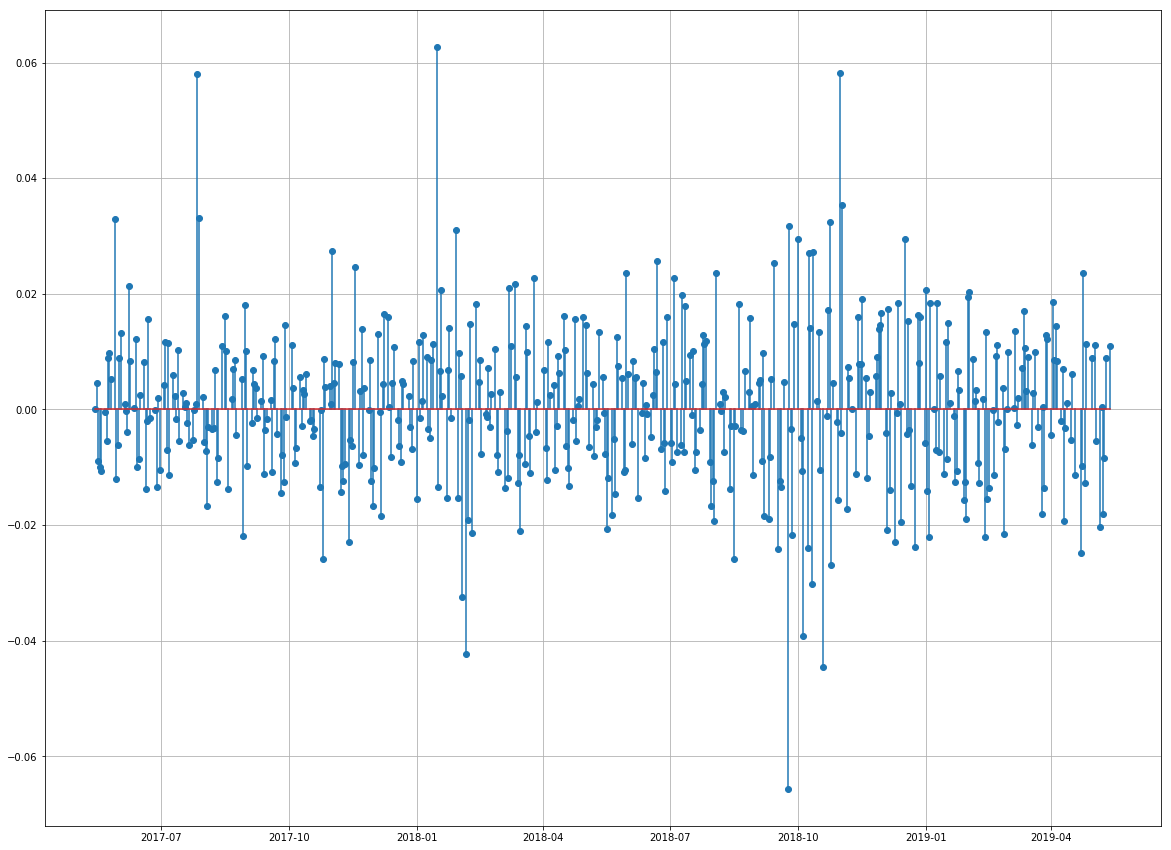

In [87]:
#Plotting the stem plot of Day_Perc_Change
plt.figure(figsize=(20,15))

plt.stem(mat.index,mat.Day_Perc_Change)
plt.grid()

There is a large change in near August of 2017 , January 2018, September 2018 , November 2018

**Answer 2.3**

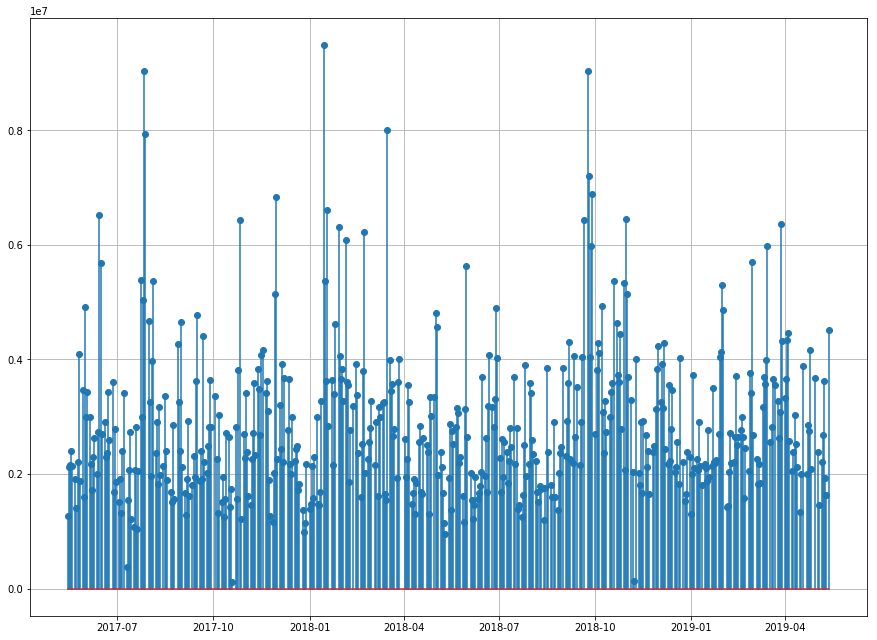

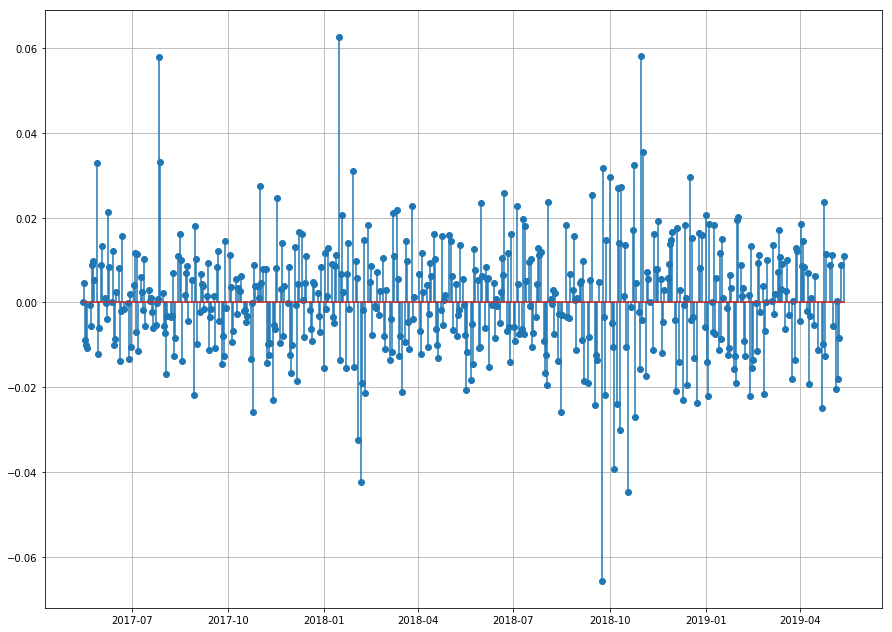

In [130]:
#Plotting the Total Traded Quantity as a stem plot
plt.figure(figsize=(15,11))
plt.stem(mat.index,mat["Total Traded Quantity"])
plt.grid()

plt.figure(figsize=(15,11))
plt.stem(mat.index,mat.Day_Perc_Change)
plt.grid()

By comparing the stem plots above we find that whenever there is a large change change in daily percentage change values then the volume of trade also changes significantly. This can be due to the fact that when change of daily change values is in the posotive direction then the stocks are bought more often and if the change is in the negative directive the stocks are sold more often.  

**Answer 2.4**

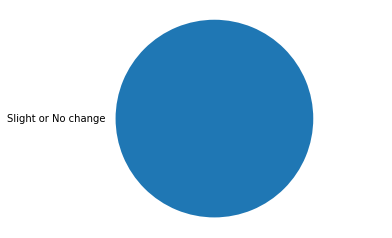

In [131]:
#Plotting a pie chart of the trend type. In this case there is only one type of trend so a simple circular pie chart
l=mat["Trend"].value_counts()

plt.pie(l.values,labels=l.index)

plt.axis('equal')

plt.show()

<Container object of 494 artists>

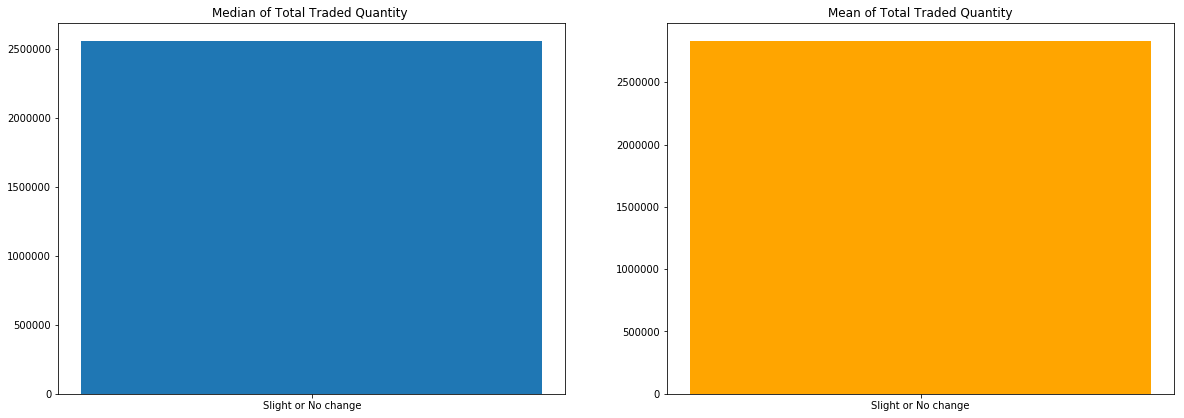

In [132]:
#Plotting the Median and Mean of Total traded Quantity according to trend type. As there is only on trend so only one bar graph

mat.groupby(["Trend"])

plt.figure(figsize=(20,15))

plt.subplot(221)
plt.title("Median of Total Traded Quantity ")
plt.bar(mat.Trend,mat["Total Traded Quantity"].median())

plt.subplot(222)

plt.title("Mean of Total Traded Quantity")
plt.bar(mat.Trend,mat["Total Traded Quantity"].mean(),color = "orange")



**Answer 2.5**

(array([  3.,   4.,   5.,  18.,  38.,  97., 160., 120.,  41.,   8.]),
 array([29.54 , 35.812, 42.084, 48.356, 54.628, 60.9  , 67.172, 73.444,
        79.716, 85.988, 92.26 ]),
 <a list of 10 Patch objects>)

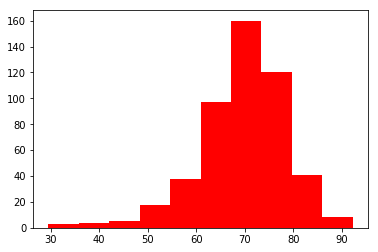

In [133]:
#Plotting a histogram for daily qauntity to traded quantity in percentage
plt.hist(mat['% Dly Qt to Traded Qty'],color="red")

**Answer 2.6**

In [134]:
#Loading the csv files for 5 companies
cipla = pd.read_csv("CIPLA.csv")
cipla = cipla[cipla["Series"]=="EQ"]#Eliminating columns not having Series value as EQ

infratel = pd.read_csv("INFRATEL.csv")
infratel = infratel[infratel["Series"]=="EQ"]

itdc = pd.read_csv("ITDC.csv")
itdc = itdc[itdc["Series"]=="EQ"]

rcom = pd.read_csv("RCOM.csv")
rcom = rcom[rcom["Series"]=="EQ"]

tcs = pd.read_csv("TCS.csv")
tcs = tcs[tcs["Series"]=="EQ"]

In [135]:
#Making a new dataframe Merged and assingning columns of all the stock prices of 5 companies
merged = pd.DataFrame(cipla["Close Price"])
merged["Infratel"] = infratel["Close Price"].values
merged["Itdc"] = itdc["Close Price"].values
merged["RCOM"] = rcom["Close Price"].values
merged["tcs"] = tcs["Close Price"].values

merged.columns = ["Cipla","Infratel","Itdc","RCOM","Tcs"]# Renaming the names of columns as the names of companies

In [136]:
merged.tail()

,Cipla,Infratel,Itdc,RCOM,Tcs
491,557.95,268.00,254.30,2.1,2151.95
492,558.00,266.70,251.95,2.2,2152.85
493,557.75,267.10,246.25,2.3,2172.55
494,555.55,262.25,251.15,2.4,2135.80
495,546.70,265.45,242.75,2.3,2128.75


In [137]:
#Making a new dataframe "perc" and calculating all the percent changes for all the 5 stock prices
perc = pd.DataFrame()
perc["Itdc"]= merged["Itdc"].pct_change()
perc["Infratel"] = merged["Infratel"].pct_change()
perc["RCOM"] = merged["RCOM"].pct_change()
perc["Tcs"] = merged["Tcs"].pct_change()
perc["Cipla"] = merged["Cipla"].pct_change()

In [138]:
perc.dropna(inplace = True)# Dropping the null values from the dataframe

In [139]:
perc.head()

,Itdc,Infratel,RCOM,Tcs,Cipla
1,-0.020688,0.014823,0.003125,0.027081,-0.005975
2,-0.015627,0.035453,-0.004673,0.010786,-0.005746
3,-0.035261,-0.028212,-0.028169,0.032928,-0.004001
4,-0.017117,0.000132,-0.016103,-0.011454,0.008659
5,-0.033064,0.023750,-0.024550,0.009652,-0.003275


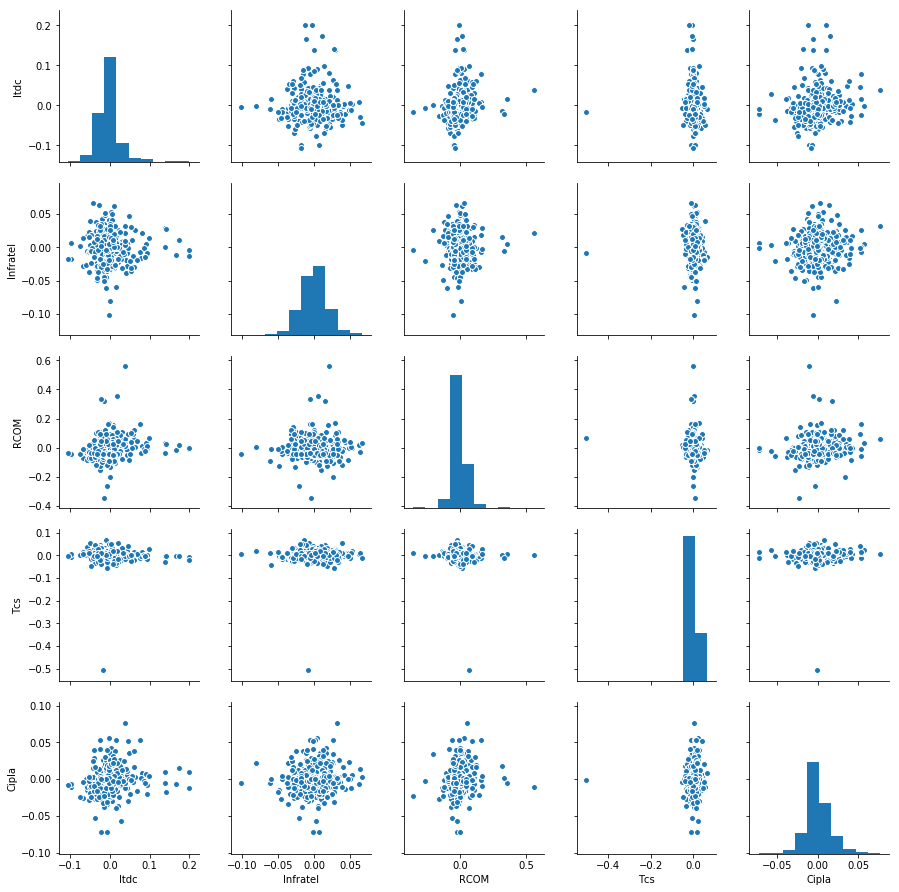

In [140]:
sb.pairplot(perc)# Plotting the correlation matrix for all the 5 stocks

**Answer 2.7**

In [141]:
perc.Cipla.rolling(7,min_periods=1).mean()# Calculating the 7 day rolling average for Cipla stock

1     -0.005975
2     -0.005861
3     -0.005241
4     -0.001766
5     -0.002068
6     -0.010573
7     -0.012693
8     -0.016142
9     -0.019601
10    -0.014222
11    -0.014004
12    -0.011899
13    -0.004534
14     0.003114
15     0.008696
16     0.012936
17     0.009613
18     0.010788
19     0.009398
20     0.010202
21     0.005720
22     0.001422
23     0.003989
24    -0.000796
25    -0.002629
26    -0.000732
27    -0.003101
28    -0.002861
29     0.000421
30    -0.003822
         ...   
466   -0.001900
467   -0.002383
468   -0.001259
469   -0.002029
470   -0.001117
471   -0.001732
472   -0.002245
473    0.001824
474   -0.000002
475    0.000896
476    0.005654
477    0.006051
478    0.009274
479    0.012071
480    0.007274
481    0.009635
482    0.007726
483    0.003999
484    0.003616
485    0.000239
486    0.000467
487    0.001478
488    0.001068
489    0.000904
490    0.000461
491   -0.000108
492    0.000660
493   -0.002580
494   -0.002401
495   -0.004829
Name: Cipla, Length: 493

In [142]:
perc.Cipla.rolling(7,min_periods=1).mean().std()#Calculating the standard deviation of the 7 day rolling average

0.005707237612410219

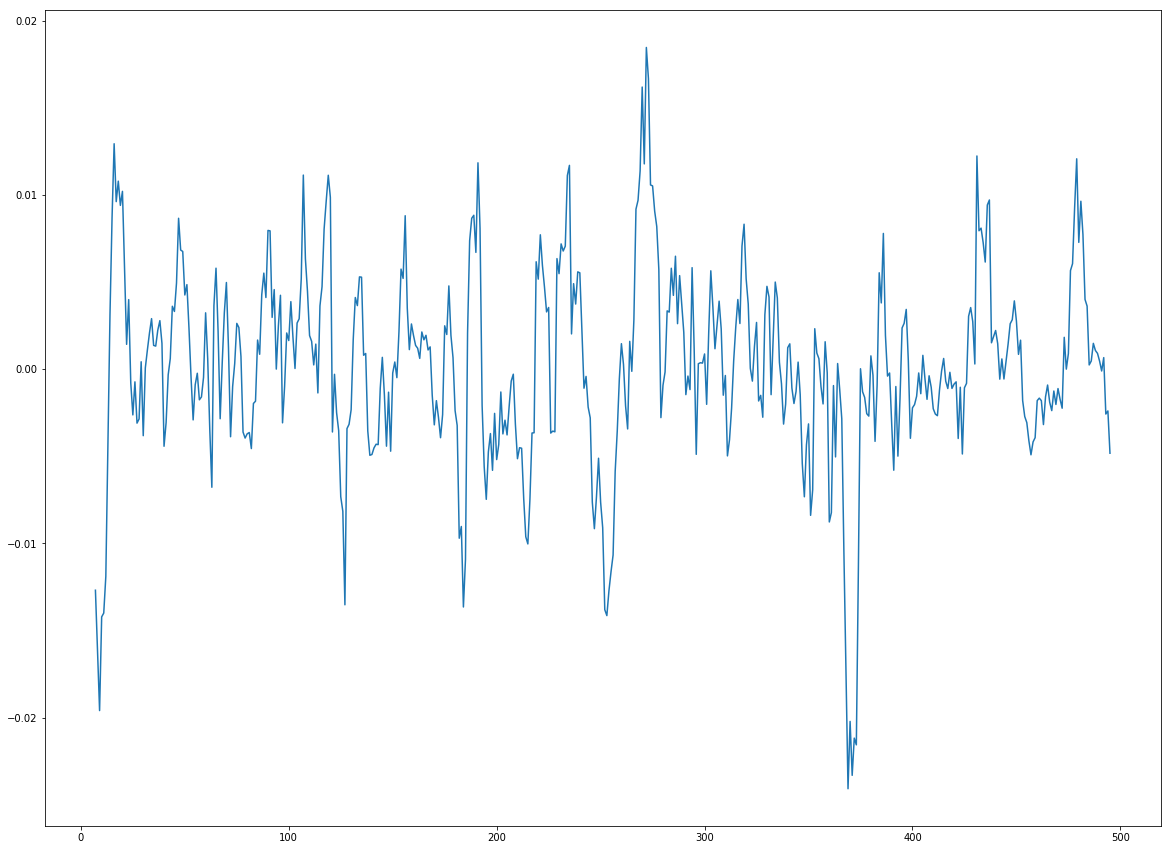

In [143]:
#Plotting the 7 day rolling average of Cipla stock
plt.figure(figsize=(20,15))

plt.plot(perc.Cipla.rolling(7).mean())

**Answer 2.8**

In [144]:
nifty = pd.read_csv("Nifty50.csv")#Loading the Nifty50 index file
nifty.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77


In [145]:
nifty["Day_Perc_Change"] = nifty["Close"].pct_change()#Making a new column Day_perc_Change for nifty dataframe
nifty["Day_Perc_Change"][0]=0# Assigning the first value of Day_Perc_Change as 0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


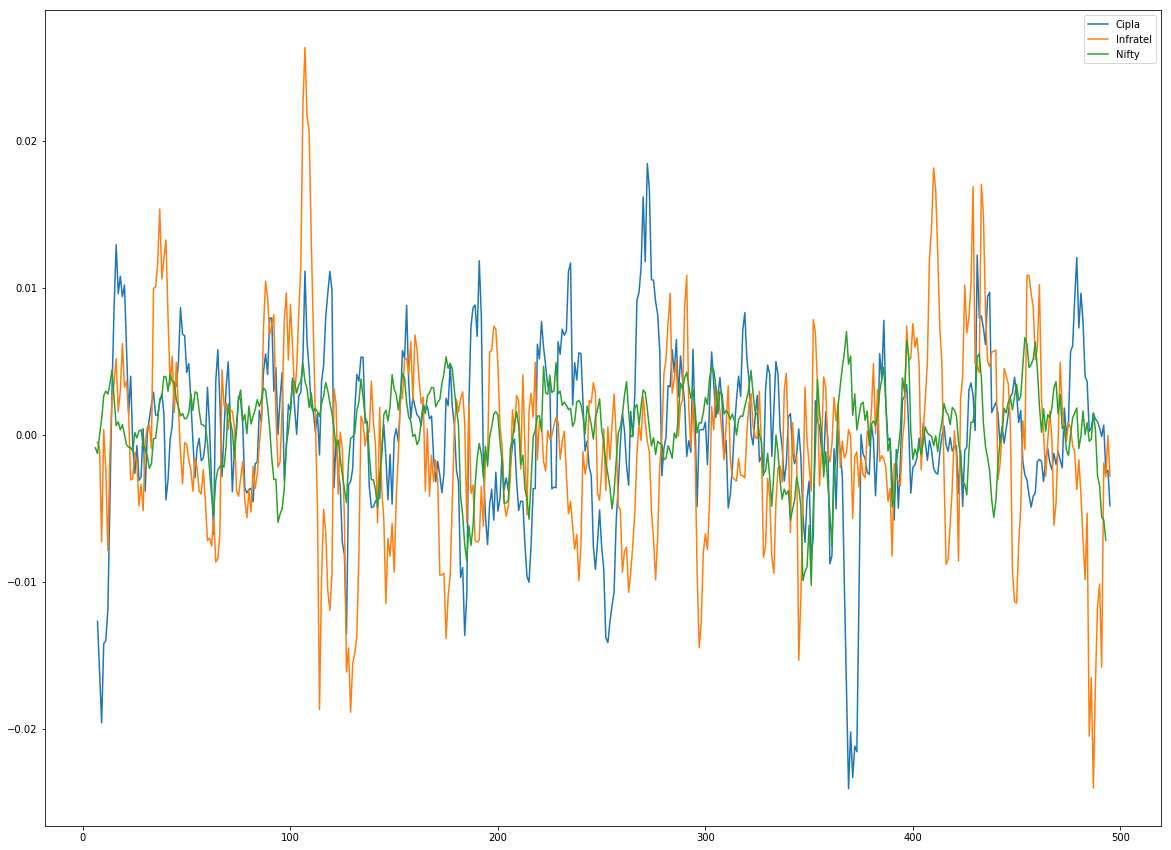

In [146]:
#Plotting the 7 day rolling average for Cipla , Infratel and Nifty
plt.figure(figsize=(20,15))

plt.plot(perc.Cipla.rolling(7).mean())
plt.plot(perc.Infratel.rolling(7).mean())
plt.plot(nifty.Day_Perc_Change.rolling(7).mean(),label="Nifty")
plt.legend()

**Answer 2.9**

In [147]:
# Trade Calls

In [148]:
short_window =21 # Assigning value for short window as 21
long_window = 34 # Assigning value fo long window as 34
call = pd.DataFrame() # Making a new dataframe as call
call["signal"] =0.0 # Initializing column "signal" as 0
call["SMA_short"] = mat["Close Price"].rolling(window=short_window,min_periods=1,).mean() # Calculating the simple moving average for short window 
call["SMA_long"] = mat["Close Price"].rolling(window=long_window,min_periods=1,).mean() # Calculating the simple moving average for long window
call["signal"] = np.where(call["SMA_short"]>call["SMA_long"],1.0,0.0) # Setting a signal=1 when the sma for short window becomes larger than sma for long window
call["positions"] = call["signal"].diff() # Calculating the differences of the signal column and storing it
call["positions"][0]=0 # As there is no previous column to subtract with setting the first value as 0

In [149]:
call.head()

,signal,SMA_short,SMA_long,positions
Date,,,,
2017-05-15,0.0,1559.500000,1559.500000,0.0
2017-05-16,0.0,1563.025000,1563.025000,0.0
2017-05-17,0.0,1559.516667,1559.516667,0.0
2017-05-18,0.0,1553.900000,1553.900000,0.0
2017-05-19,0.0,1547.240000,1547.240000,0.0


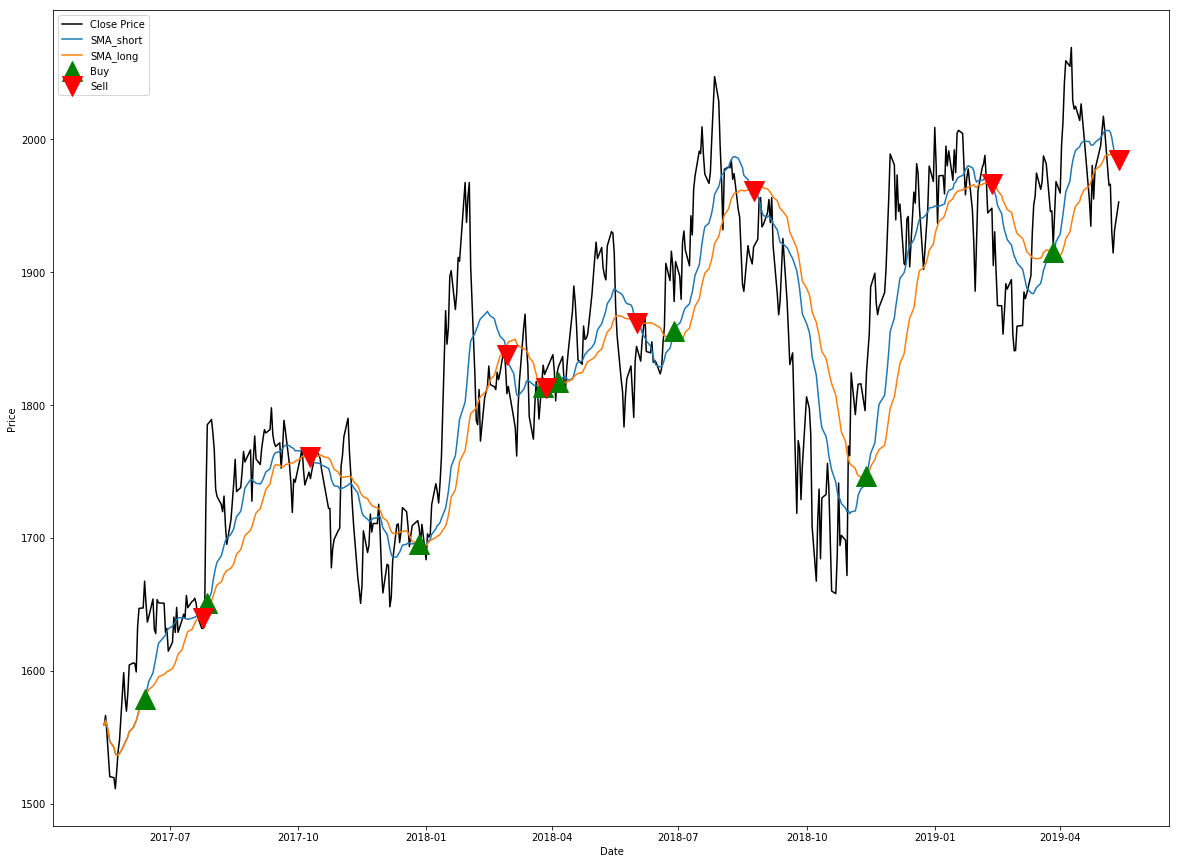

In [150]:
plt.figure(figsize=(20,15))
plt.plot(mat["Close Price"],color="black")#Plottimg the close price of HDFC stock
plt.plot(call["SMA_short"])#Plotting the short window simple moving average
plt.plot(call["SMA_long"])#Plotting the long window simple moving average
plt.ylabel("Price")
plt.xlabel("Date")
plt.plot(call.loc[call["positions"]==1.0].index,call.SMA_short[call["positions"]==1.0],'^',color='green',markersize=20,label="Buy")#Plotting the marker for the buy signal, when the sma 21 becomes greater than sma 34
plt.plot(call.loc[call["positions"]==-1.0].index,call.SMA_short[call["positions"]==-1.0],'v',color='red',markersize=20,label="Sell")#Plotting the marker for sell signal, when the sma 34 becomes greater then sma 21
plt.legend(loc='upper left')

**Answer 2.10**

In [151]:
#Bollinger Bands

In [152]:
boll_band = pd.DataFrame()
boll_band["Rolling_avg"] = mat["Close Price"].rolling(14,min_periods=1).mean()#Calculating the 14 day rolling average for close price of HDFC stock
boll_band["Upper_band"] = boll_band["Rolling_avg"]+2*(mat["Close Price"].rolling(14,min_periods=1).mean().std())#Calculating the upper band
boll_band["Lower_band"] = boll_band["Rolling_avg"]-2*(mat["Close Price"].rolling(14,min_periods=1).mean().std())#Calculating the lower band

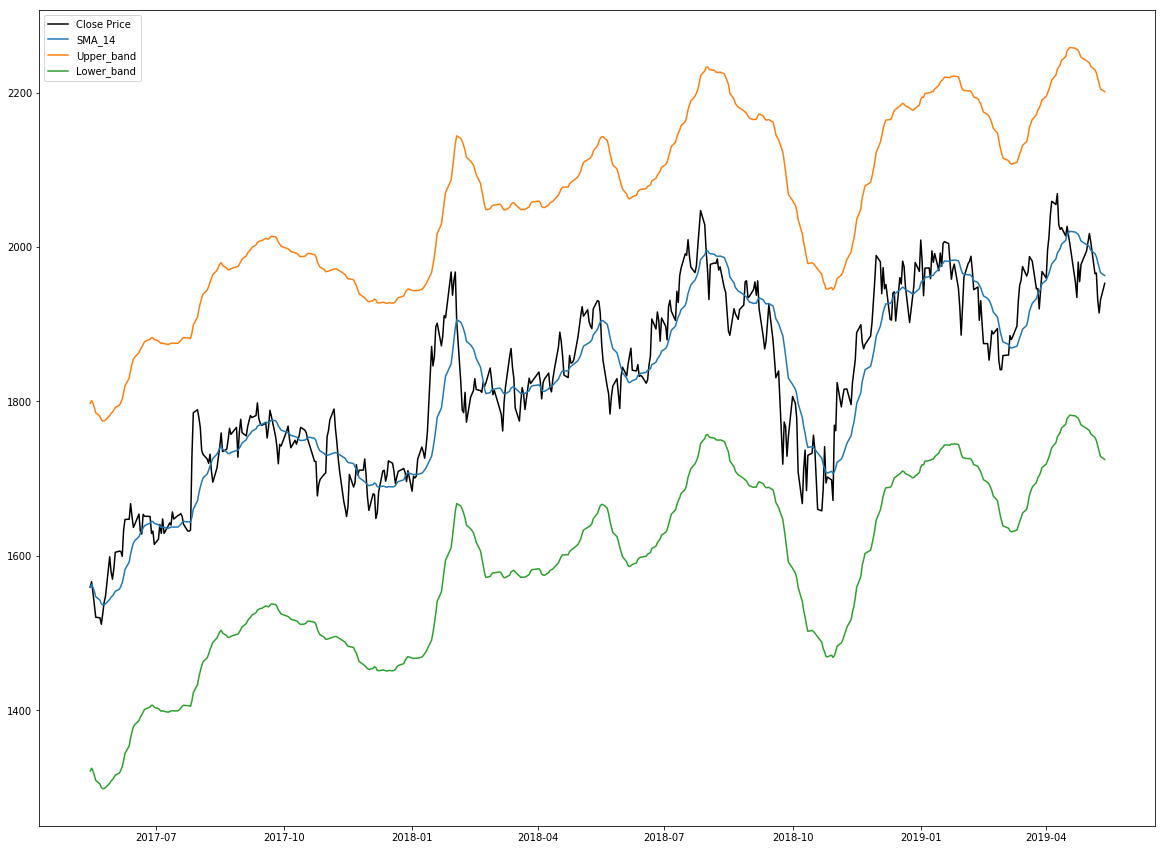

In [153]:
#Plotting the Bollinger Bands 
plt.figure(figsize=(20,15))
plt.plot(mat["Close Price"],color="black")
plt.plot(boll_band["Rolling_avg"],label="SMA_14")
plt.plot(boll_band["Upper_band"])
plt.plot(boll_band["Lower_band"])
plt.legend()

When the stock price is very near to the upper band then the stock is said to be expensive.When the stock price is very near to the lower band the stock price is said to be cheap. 
The gap between the bands is wider then the stock is volatile.
